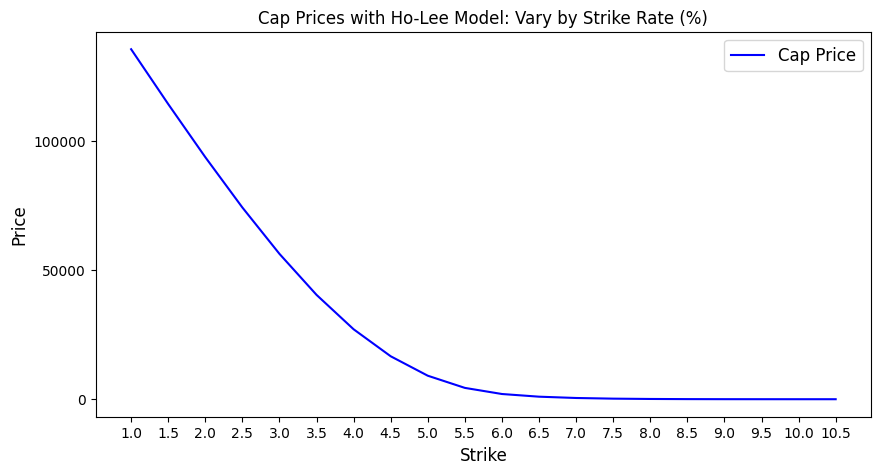

In [2]:
import sys
import os
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Custom module
import model_ho_lee as model

#%%    
zero_coupons = pd.read_csv('https://raw.githubusercontent.com/wrcarpenter/Interest-Rate-Models/main/Data/zcbs.csv')
zcbs  = zero_coupons.loc[zero_coupons['Date']=='3/8/2024']
zcbs  = zcbs.drop("Date", axis=1)
# small example for calibration

notion = 1000000
sigma  = 0.009
strike = 5.50 
delta  = 1/12
cpn    = 0
prob   = 1/2

zeros = np.array(zcbs.iloc[:,0:60])
x     = model.build(zeros, sigma, delta)
tree  = model.rateTree(x[0], x[2], sigma, delta)
cap   = model.cf_cap(tree, strike, delta, notion, cpn)
p     = model.priceTree(tree, prob, cap, delta, "cap", notion)

px    = p[0]
ptree = p[1]

#%%
# Varying rate strike for cap pricing 
# Create cap pricing array 

pricing = np.zeros([20,5])
strike  = 1.00

for row in range(0, pricing.shape[0]):
    
    pricing[row, 0] = notion
    pricing[row, 1] = strike
    pricing[row, 2] = zeros.shape[1] # periods
    pricing[row, 3] = sigma
    
    cashflow = model.cf_cap(tree, strike, delta, notion, cpn)
    output   = model.priceTree(tree, prob, cashflow, delta, "cap", notion)
    
    px = output[0]
    
    pricing[row, 4] = px
    strike = strike + 0.50

pricing = pd.DataFrame(pricing, columns=["Notional", "Strike", "Periods", "Volatility", "Price"])
    
#%%
# Chart the given array 

def chart_cap_pricing(arr, w, l, title):
    
    x1 = np.array(arr['Strike'])
    y1 = np.array(arr['Price'])
    
    fig,ax = plt.subplots(figsize=(w,l))
    ax.set_xticks(np.arange(0, len(arr)+1, 0.5))
    ax.set_yticks(np.arange(0,300000,50000))
    
    ax.set_title(title, fontsize="large")
    ax.set_ylabel('Price', fontsize="large")
    ax.set_xlabel('Strike', fontsize="large")
    
    plt.plot(x1, y1, color='blue', label="Cap Price")
    
    plt.legend(loc='upper right', fontsize='large')

chart_cap_pricing(pricing, 10, 5, "Cap Prices with Ho-Lee Model: Vary by Strike Rate (%)") 